# Avaliação dos algoritmos - credit

- Naïve Bayes: 93.8%
- Árvore de decisão: 98.2%
- Random forest: 98.4%
- Regras: 97.2%
- Knn: 97.4%
- Regressão logística: 94.4%
- SVM: 94.6%
- Redes neurais: 99.6%

## Tuning dos parâmetros com GridSearch

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold

import seaborn as sns

### Importando a base de dados

In [2]:
with open('./data/credit.pkl', 'rb') as f:
    X_train_credit, y_train_credit, X_test_credit, y_test_credit = pickle.load(f)

In [3]:
X_train_credit.shape, y_train_credit.shape

((1500, 3), (1500,))

In [4]:
X_test_credit.shape, y_test_credit.shape

((500, 3), (500,))

In [5]:
X_credit = np.concatenate((X_train_credit, X_test_credit), axis = 0)
X_credit.shape

(2000, 3)

In [6]:
X_credit

array([[-1.38977008,  0.51327405,  0.09505576],
       [ 1.44720202, -1.66082919, -1.22989188],
       [-0.80722238,  0.22981706, -0.44850643],
       ...,
       [ 1.3632982 , -1.06417876, -1.14051678],
       [-1.5854262 , -0.63790114, -0.38461493],
       [-1.04965576, -0.94546774,  0.02768328]])

In [7]:
y_credit = np.concatenate((y_train_credit, y_test_credit), axis = 0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1])

## Modelos

In [9]:
model_best_dic = {}

### Árvore de decisão

In [10]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [11]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['DecisionTree'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
0.983


### Random forest

In [12]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['RandomForest'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

RandomForestClassifier(criterion='entropy')
0.9870000000000001


### Knn

In [14]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [15]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['KNeighbors'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

KNeighborsClassifier(n_neighbors=20, p=1)
0.9800000000000001


### Regressão logística

In [16]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [17]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['LogisticRegression'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression()
0.9480000000000001


### SVM

In [18]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [19]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['SVC'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

SVC(C=1.5)
0.9835


### Redes neurais

In [20]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [21]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
model_best_dic['MLP'] = grid_search.best_estimator_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

MLPClassifier(batch_size=10)
0.9964999999999999


## Validação cruzada

In [22]:
result = {}
for i in model_best_dic.keys():
    result[i] = []

In [23]:
%%time
for i in range(30):
    # print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    for key, model in model_best_dic.items():
            scores = cross_val_score(model, X_credit, y_credit, cv=kfold)
            result[key].append(scores.mean())

CPU times: user 27min 38s, sys: 3min 8s, total: 30min 47s
Wall time: 26min 53s


In [24]:
resultados = pd.DataFrame(result)
resultados

,DecisionTree,RandomForest,KNeighbors,LogisticRegression,SVC,MLP
0,0.9870,0.9870,0.9805,0.9475,0.9835,0.9975
1,0.9855,0.9865,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9905,0.9800,0.9470,0.9830,0.9980
3,0.9875,0.9870,0.9790,0.9460,0.9850,0.9965
4,0.9885,0.9880,0.9810,0.9465,0.9850,0.9975
5,0.9885,0.9880,0.9785,0.9465,0.9830,0.9970
6,0.9885,0.9900,0.9800,0.9470,0.9845,0.9950
7,0.9875,0.9890,0.9805,0.9475,0.9845,0.9955
8,0.9860,0.9880,0.9805,0.9465,0.9820,0.9960
9,0.9870,0.9885,0.9805,0.9465,0.9830,0.9970


In [25]:
resultados.describe()

,DecisionTree,RandomForest,KNeighbors,LogisticRegression,SVC,MLP
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.987283,0.980233,0.946933,0.983900,0.996717
std,0.001883,0.001284,0.001223,0.000653,0.001078,0.000739
min,0.982500,0.984000,0.977500,0.945500,0.982000,0.995000
25%,0.986125,0.986625,0.980000,0.946500,0.983000,0.996500
50%,0.987250,0.987000,0.980250,0.947000,0.984000,0.997000
75%,0.988500,0.988000,0.980500,0.947500,0.984500,0.997375
max,0.990500,0.990500,0.984000,0.948500,0.986500,0.998000


In [26]:
resultados.var()

DecisionTree          3.547126e-06
RandomForest          1.649713e-06
KNeighbors            1.495402e-06
LogisticRegression    4.264368e-07
SVC                   1.162069e-06
MLP                   5.462644e-07
dtype: float64

In [27]:
(resultados.std() / resultados.mean()) * 100

DecisionTree          0.190774
RandomForest          0.130096
KNeighbors            0.124753
LogisticRegression    0.068962
SVC                   0.109563
MLP                   0.074153
dtype: float64

## Teste de normalidade nos resultados

- Shapiro: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [28]:
alpha = 0.05

In [29]:
from scipy.stats import shapiro

In [30]:
model_best_dic.keys()

dict_keys(['DecisionTree', 'RandomForest', 'KNeighbors', 'LogisticRegression', 'SVC', 'MLP'])

In [31]:
shapiro(result['DecisionTree']), 
shapiro(result['RandomForest']), 
shapiro(result['KNeighbors']), 
shapiro(result['LogisticRegression']), 
shapiro(result['SVC']), 
shapiro(result['MLP'])

ShapiroResult(statistic=0.9308745265007019, pvalue=0.051802948117256165)

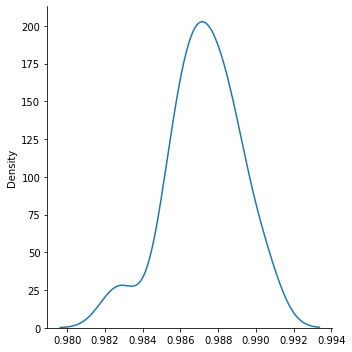

In [32]:
sns.displot(result['DecisionTree'], kind = 'kde');

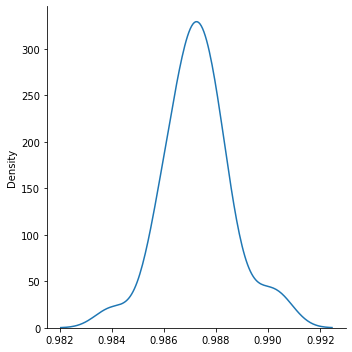

In [33]:
sns.displot(result['RandomForest'], kind = 'kde');

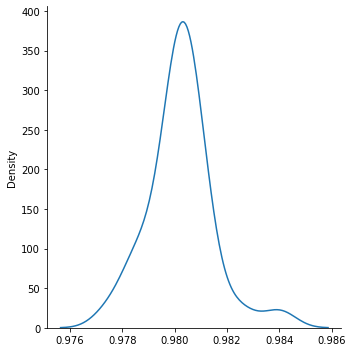

In [34]:
sns.displot(result['KNeighbors'], kind = 'kde');

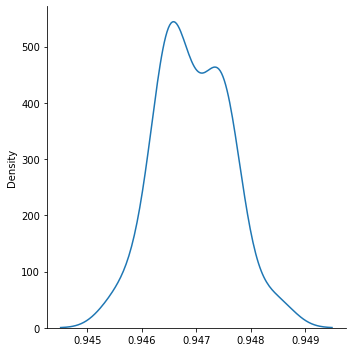

In [35]:
sns.displot(result['LogisticRegression'], kind = 'kde');

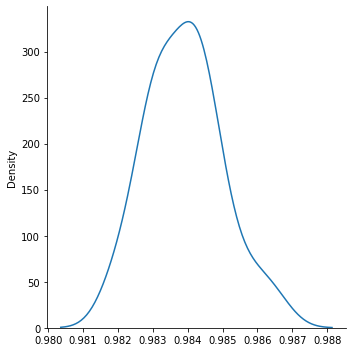

In [36]:
sns.displot(result['SVC'], kind = 'kde');

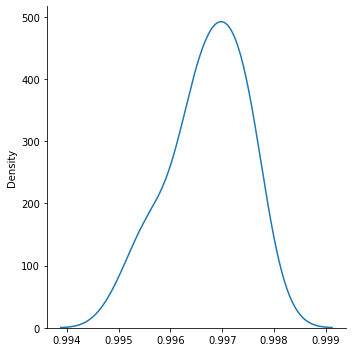

In [37]:
sns.displot(result['MLP'], kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [38]:
from scipy.stats import f_oneway

In [39]:
_, p = f_oneway(result['DecisionTree'], result['RandomForest'], result['KNeighbors'], result['LogisticRegression'],result['SVC'], result['MLP'])
p

2.8029146309760174e-193

In [40]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [41]:
resultados_algoritmos = {
    'accuracy': np.concatenate([result['DecisionTree'], result['RandomForest'], result['KNeighbors'], result['LogisticRegression'], result['SVC'], result['MLP']]),
    'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                  'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                  'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                  'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                  'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                  'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']
}

In [42]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9870,arvore
1,0.9855,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9885,arvore
...,...,...
175,0.9970,rede_neural
176,0.9975,rede_neural
177,0.9960,rede_neural
178,0.9970,rede_neural


In [43]:
from statsmodels.stats.multicomp import MultiComparison

In [44]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [45]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn   -0.007 0.001 -0.0079 -0.0061   True
       arvore     logistica  -0.0403 0.001 -0.0412 -0.0394   True
       arvore random_forest      0.0   0.9 -0.0009   0.001  False
       arvore   rede_neural   0.0095 0.001  0.0086  0.0104   True
       arvore           svm  -0.0033 0.001 -0.0042 -0.0024   True
          knn     logistica  -0.0333 0.001 -0.0342 -0.0324   True
          knn random_forest    0.007 0.001  0.0061   0.008   True
          knn   rede_neural   0.0165 0.001  0.0156  0.0174   True
          knn           svm   0.0037 0.001  0.0028  0.0046   True
    logistica random_forest   0.0403 0.001  0.0394  0.0413   True
    logistica   rede_neural   0.0498 0.001  0.0489  0.0507   True
    logistica           svm    0.037 0.001  0.0361  0.0379   True
random_for

In [46]:
resultados.mean()

DecisionTree          0.987233
RandomForest          0.987283
KNeighbors            0.980233
LogisticRegression    0.946933
SVC                   0.983900
MLP                   0.996717
dtype: float64

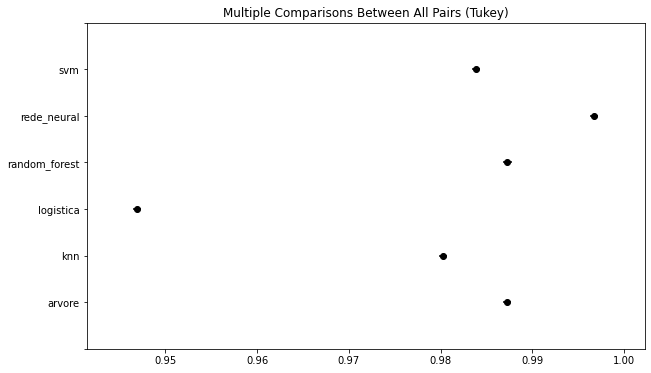

In [47]:
teste_estatistico.plot_simultaneous();